<a href="https://colab.research.google.com/github/kalyaanrr/ECommerceTransactionDataset/blob/main/Kalyaan_Mahendar_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

print(customers.info())
print(products.info())
print(transactions.info())
print()
print("---------------------------------------------")

print("Checking for null values")
print(customers.isnull().sum())
print(products.isnull().sum())
print(transactions.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------

Analyzing Customers, based on the **Region**.

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


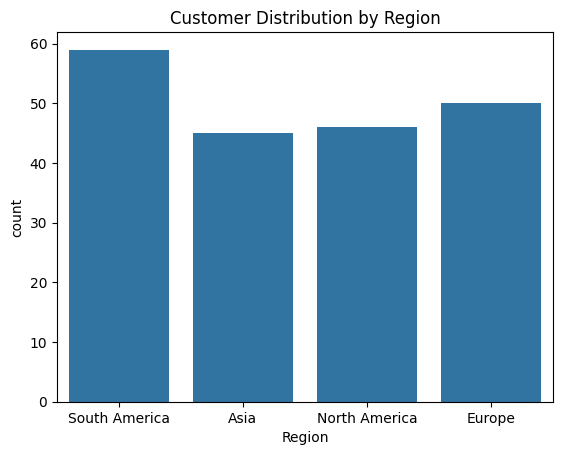

In [ ]:
print(customers['Region'].value_counts())
sns.countplot(data=customers,x='Region')
plt.title("Customer Distribution by Region")
plt.show()

Analysing Price by **Product Category**

Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


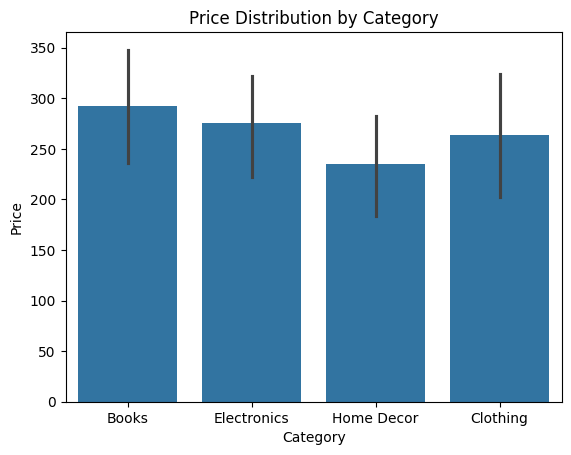

In [ ]:
print(products['Category'].value_counts())
sns.barplot(data=products,x='Category',y='Price')
plt.title("Price Distribution by Category")
plt.show()

**Analysing Transactions**

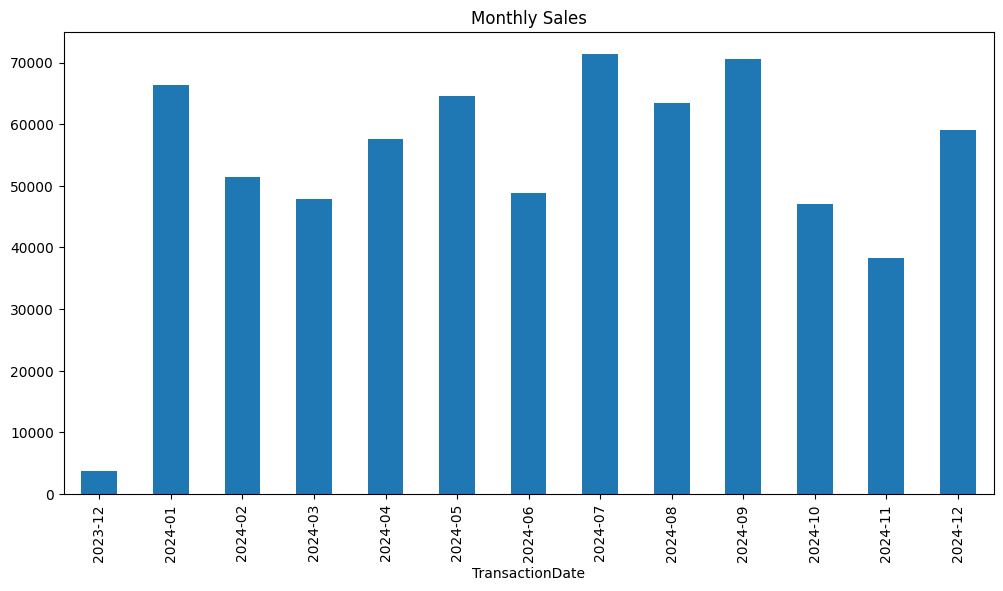

In [ ]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
monthlySales = transactions.groupby(transactions['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()
monthlySales.plot(kind='bar',figsize=(12,6),title='Monthly Sales')
plt.show()

In [ ]:
merged_data = pd.merge(transactions,customers,on='CustomerID')
merged_data = pd.merge(merged_data,products,on='ProductID')
merged_data.rename(columns={'Price_x':'ProductPrice','Price_y':'TransactionPrice'},inplace=True)

**5 Business Insights** that can be done in E-Commerce as follows


*   **Top Performing Products.**
*   **Regional Sales Distribution.**
*   **Seasonal/Monthly Sales Trends.**
*   **Customer Purchasing Behaviour.**
*   **Price Sensitivity and Product Categories.**







**1.Top-Peforming Products**

In [ ]:
top_products = merged_data.groupby('ProductName')['TotalValue'].sum().sort_values(ascending=False).head(5)
print("Top 5 Performing Products")
print(top_products)

Top 5 Performing Products
ProductName
ActiveWear Smartwatch    39096.97
SoundWave Headphones     25211.64
SoundWave Novel          24507.90
ActiveWear Jacket        22712.56
ActiveWear Rug           22314.43
Name: TotalValue, dtype: float64


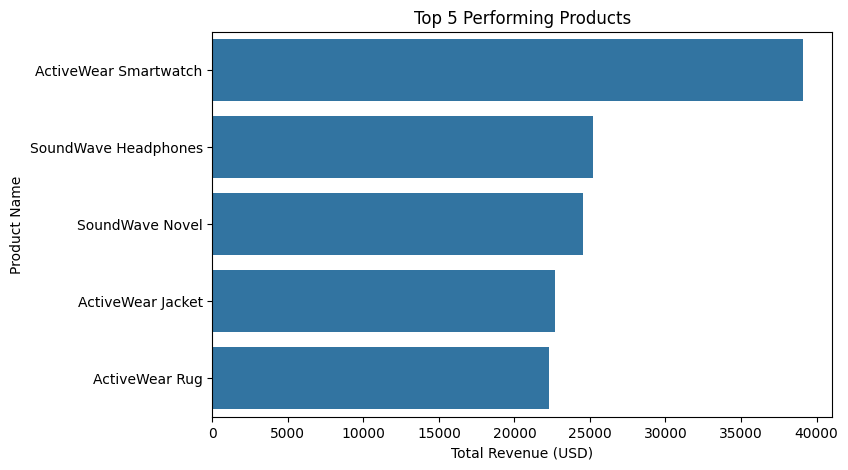

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(x=top_products.values,y=top_products.index)
plt.title("Top 5 Performing Products")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Product Name")
plt.show()

**2.Regional Sales Distribution**

Regional Sales Distribution
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


Text(0, 0.5, 'Region')

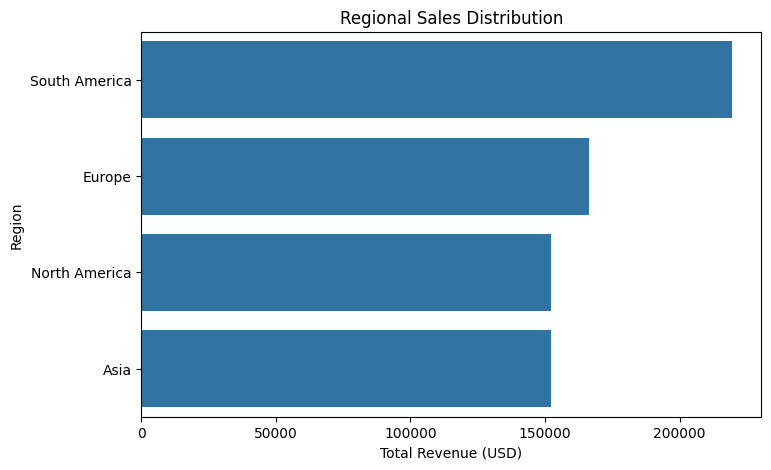

In [ ]:
regional_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Regional Sales Distribution")
print(regional_sales)

plt.figure(figsize=(8,5))
sns.barplot(x=regional_sales.values,y=regional_sales.index)
plt.title("Regional Sales Distribution")
plt.xlabel("Total Revenue (USD)")
plt.ylabel("Region")
plt.ylabel("Region")

**3.Seasonal/Monthly Sales Trends**


Seasonal/Monthly Sales Trends
Month
1     66376.39
2     51459.27
3     47828.73
4     57519.06
5     64527.74
6     48771.18
7     71366.39
8     63436.74
9     70603.75
10    47063.22
11    38224.37
12    62818.72
Name: TotalValue, dtype: float64


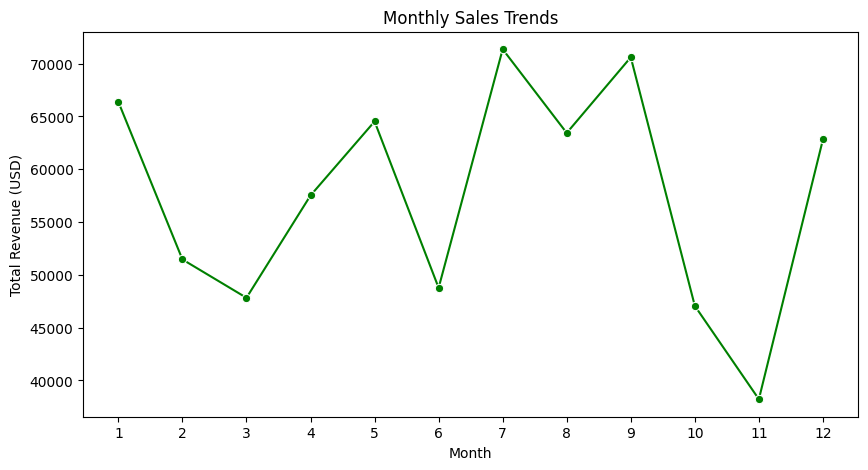

In [29]:
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
merged_data['Month'] = merged_data['TransactionDate'].dt.month
monthly_sales = merged_data.groupby('Month')['TotalValue'].sum()
print("\nSeasonal/Monthly Sales Trends")
print(monthly_sales)

#Plotting the sales
plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_sales.index,y=monthly_sales.values,marker='o',color='green')
plt.title("Monthly Sales Trends")
plt.xlabel("Month")
plt.ylabel("Total Revenue (USD)")
plt.xticks(range(1,13))
plt.show()


**4.Customer Purchasing Behaviour**


Customer by Average Transaction value:
CustomerID
C0040    1323.133333
C0089    1278.110000
C0066    1266.426667
C0168    1263.457500
C0196    1245.720000
C0096    1214.584000
C0114    1156.086000
C0185    1141.440000
C0138    1122.050000
C0148    1091.558000
Name: TotalValue, dtype: float64


Text(0, 0.5, 'Customer ID')

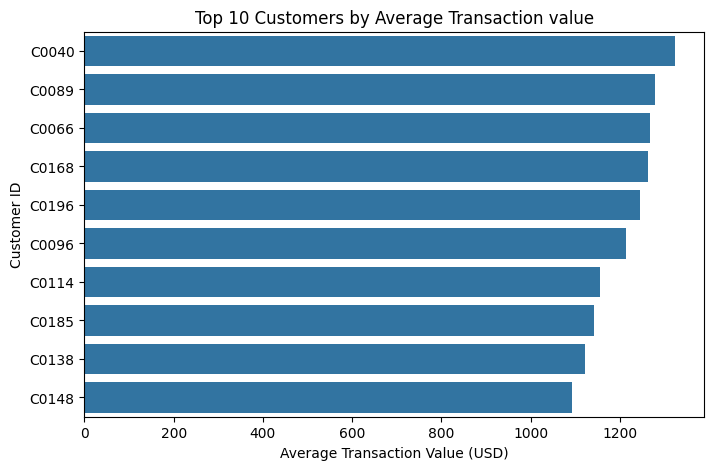

In [ ]:
cat = merged_data.groupby('CustomerID')['TotalValue'].mean().sort_values(ascending=False).head(10)
print("\nCustomer by Average Transaction value:")
print(cat)

plt.figure(figsize=(8,5))
sns.barplot(x=cat.values,y=cat.index)
plt.title("Top 10 Customers by Average Transaction value")
plt.xlabel("Average Transaction Value (USD)")
plt.ylabel("Customer ID")

**5.Price Sensitivity and Product Categories**


Category-Wise Price and Sales Analysis:
Average Price per Category:
Category
Home Decor     237.616250
Books          280.526222
Clothing       283.104254
Electronics    288.722008
Name: ProductPrice, dtype: float64

Total Sales per Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


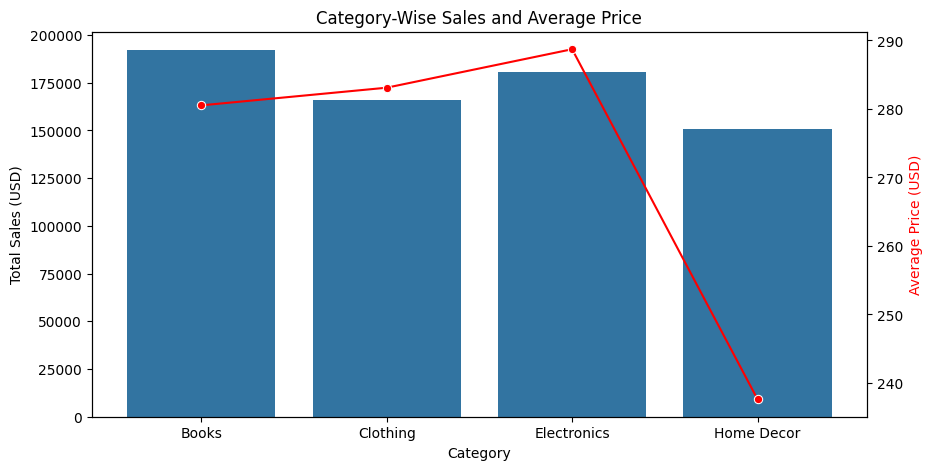

In [ ]:
category_price = merged_data.groupby('Category')['ProductPrice'].mean().sort_values(ascending=True)
category_sales = merged_data.groupby('Category')['TotalValue'].sum()

print("\nCategory-Wise Price and Sales Analysis:")
print("Average Price per Category:")
print(category_price)
print("\nTotal Sales per Category:")
print(category_sales)


fig, ax1 = plt.subplots(figsize=(10, 5))
sns.barplot(x=category_sales.index, y=category_sales.values, ax=ax1)
ax1.set_ylabel('Total Sales (USD)')
ax1.set_xlabel('Category')
ax1.set_title('Category-Wise Sales and Average Price')

ax2 = ax1.twinx()
sns.lineplot(x=category_price.index, y=category_price.values, ax=ax2, marker='o', color='red')
ax2.set_ylabel('Average Price (USD)', color='red')
plt.show()
